In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set()

# Data Cleaning

# Check the whole table

In [2]:
oneweek = pd.read_csv('one_week.csv')

In [3]:
oneweek

,paris_id,pp_from_x,pp_to_x,pp_osmstartnodeid,pp_osmendnodeid,hour,day,month,maxspeed,highway,oneway,length,lanes,q,k,speed_kph_mean,speed_kph_stddev
0,6639,94130199,96149607,2988531195,96149607,0,1,1,30.0,secondary,True,165.830,NaN,767.0,3.57055,26.797,14.294
1,6639,94130199,96149607,2988531197,2988531195,0,1,1,30.0,secondary,True,165.830,NaN,767.0,3.57055,22.959,19.268
2,6639,94130199,96149607,2988531197,2988531195,0,1,1,30.0,secondary,True,165.830,NaN,767.0,3.57055,22.959,19.268
3,6639,94130199,96149607,2988531197,2988531195,0,1,1,30.0,secondary,True,165.830,NaN,767.0,3.57055,22.959,19.268
4,6639,94130199,96149607,2988531197,2988531195,0,1,1,30.0,secondary,True,165.830,NaN,767.0,3.57055,22.959,19.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353380,5414,190949412,209165758,190949412,25075886,21,2,1,70.0,trunk,True,608.437,4.0,2729.0,7.95000,71.928,9.778
353381,5414,190949412,209165758,25075886,209165758,22,2,1,70.0,trunk,True,608.437,4.0,2131.0,6.20000,71.126,9.725
353382,5414,190949412,209165758,190949412,25075886,22,2,1,70.0,trunk,True,608.437,4.0,2131.0,6.20000,72.858,8.773
353383,5414,190949412,209165758,25075886,209165758,23,2,1,70.0,trunk,True,608.437,4.0,1585.0,4.50000,70.422,10.726


Check the month variable

In [4]:
oneweek['month']. unique()

array([1], dtype=int64)

# Drop the static variables

We only use the dynamnic variables. We also drop the month from dynamic variables because it tells that data in Junuary.

In [5]:
df=oneweek.drop(['paris_id', 'pp_from_x', 'pp_to_x', 'pp_osmstartnodeid','pp_osmendnodeid','lanes', 'length','oneway','maxspeed','highway','month'], axis=1)

In [6]:
df

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
0,0,1,767.0,3.57055,26.797,14.294
1,0,1,767.0,3.57055,22.959,19.268
2,0,1,767.0,3.57055,22.959,19.268
3,0,1,767.0,3.57055,22.959,19.268
4,0,1,767.0,3.57055,22.959,19.268
...,...,...,...,...,...,...
353380,21,2,2729.0,7.95000,71.928,9.778
353381,22,2,2131.0,6.20000,71.126,9.725
353382,22,2,2131.0,6.20000,72.858,8.773
353383,23,2,1585.0,4.50000,70.422,10.726


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353385 entries, 0 to 353384
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              353385 non-null  int64  
 1   day               353385 non-null  int64  
 2   q                 353385 non-null  float64
 3   k                 353385 non-null  float64
 4   speed_kph_mean    353385 non-null  float64
 5   speed_kph_stddev  353385 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 16.2 MB


In [8]:
df.describe()

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
count,353385.000000,353385.000000,353385.000000,353385.000000,353385.000000,353385.000000
mean,11.784569,1.472759,1750.109327,6.658831,44.345251,9.888100
std,6.914348,0.499258,1976.114584,6.519021,18.607192,3.628527
min,0.000000,1.000000,0.000000,0.000000,1.544000,0.284000
25%,6.000000,1.000000,325.000000,2.258330,29.317000,7.637000
50%,12.000000,1.000000,731.000000,4.850000,40.264000,9.426000
75%,18.000000,2.000000,2806.000000,9.018890,63.482000,11.465000
max,23.000000,2.000000,7677.000000,81.621100,86.353000,54.034000


# Check the missing values

In [9]:
df.isna().sum()


hour                0
day                 0
q                   0
k                   0
speed_kph_mean      0
speed_kph_stddev    0
dtype: int64

# Drop the duplicated values on the dataset

In [10]:
df.duplicated().sum()

176319

We drop the rows which have duplicate value.

In [11]:
d=df.drop_duplicates()
d

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
0,0,1,767.0,3.57055,26.797,14.294
1,0,1,767.0,3.57055,22.959,19.268
5,0,1,767.0,3.57055,36.533,9.253
6,0,1,767.0,3.57055,38.806,6.484
7,0,1,767.0,3.57055,32.731,9.081
...,...,...,...,...,...,...
353380,21,2,2729.0,7.95000,71.928,9.778
353381,22,2,2131.0,6.20000,71.126,9.725
353382,22,2,2131.0,6.20000,72.858,8.773
353383,23,2,1585.0,4.50000,70.422,10.726


In [12]:
d['hour'].unique()

array([ 0,  1,  3,  4,  5,  2,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177066 entries, 0 to 353384
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              177066 non-null  int64  
 1   day               177066 non-null  int64  
 2   q                 177066 non-null  float64
 3   k                 177066 non-null  float64
 4   speed_kph_mean    177066 non-null  float64
 5   speed_kph_stddev  177066 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 9.5 MB


In [24]:
d.describe()
# q (vehicles flow per hour) and k (occupancy)

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
count,177066.000000,177066.000000,177066.000000,177066.000000,177066.000000,177066.000000
mean,11.852535,1.463483,1188.297719,6.099207,38.733596,9.967985
std,6.916576,0.498666,1600.499821,6.714100,16.999698,3.827278
min,0.000000,1.000000,0.000000,0.000000,1.544000,0.284000
25%,6.000000,1.000000,271.000000,1.941670,26.743000,7.485000
50%,12.000000,1.000000,525.000000,4.065280,35.036000,9.404000
75%,18.000000,2.000000,1134.000000,7.900000,47.033000,11.767000
max,23.000000,2.000000,7677.000000,81.621100,86.353000,54.034000


In [15]:
#from sklearn import preprocessing

In [57]:
#d_n = pd.DataFrame(preprocessing.normalize(d))

In [ ]:
#print("Normalized Data = ", d_n)

In [15]:
#d_n

# Data Exploration

# We will check the relation of each features 

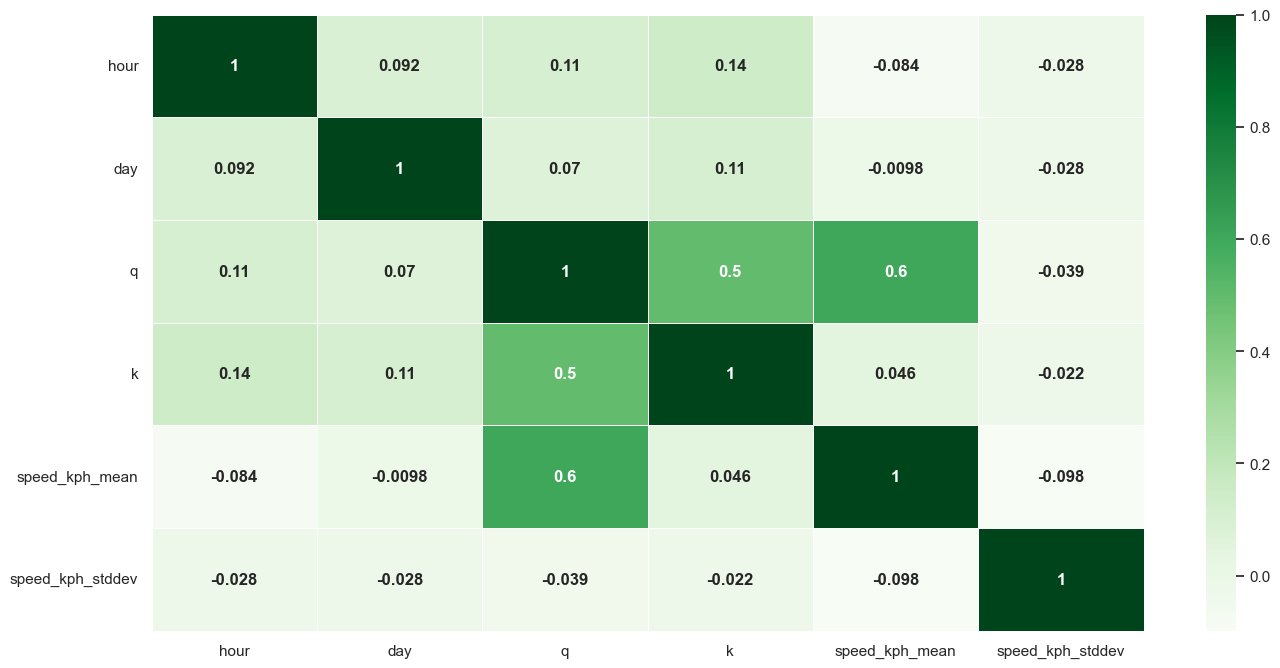

In [16]:
plt.figure(figsize=(16, 8))
sns.heatmap(d.corr(), annot_kws={'weight':'bold'},linewidths=.5, cmap="Greens", annot=True)
plt.savefig("heatmap.png")

Based on the heatmap, we could not take the conclusion from this picture. It is because each features doesn't have significant relation.

<AxesSubplot:ylabel='hour'>

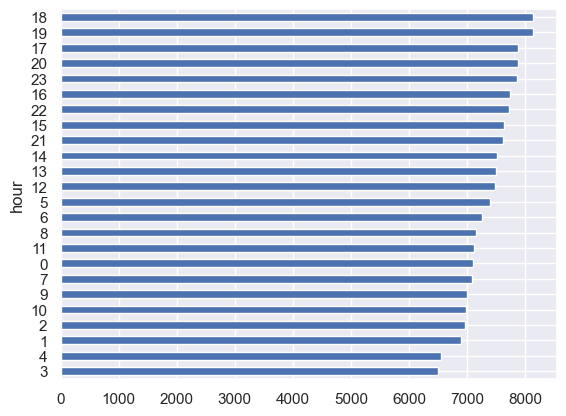

In [22]:
d['hour'].value_counts().sort_values().plot(ylabel= 'hour',kind='barh')

<AxesSubplot:ylabel='day'>

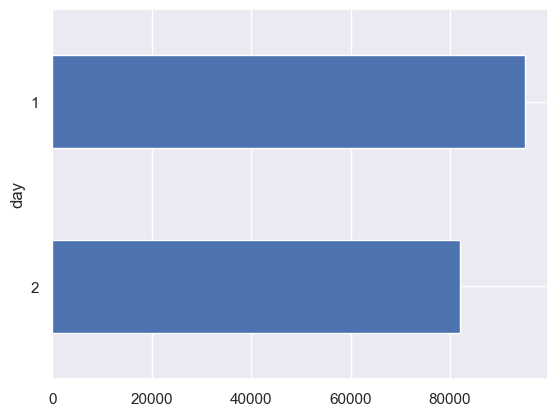

In [23]:
d['day'].value_counts().sort_values().plot(ylabel= 'day',kind='barh')

C:\Users\IdeaPad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='q', ylabel='Density'>

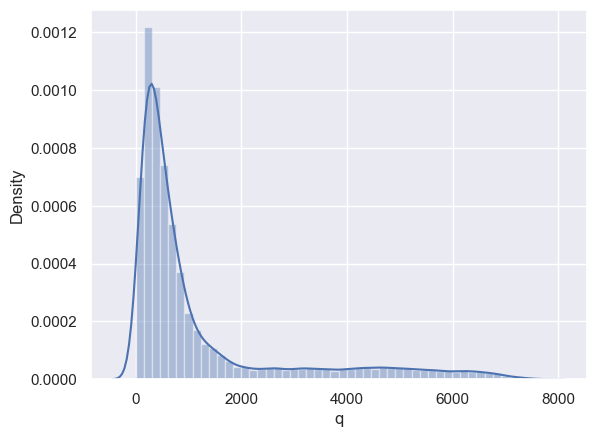

In [51]:
sns.distplot(d["q"], kde=True)

C:\Users\IdeaPad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='k', ylabel='Density'>

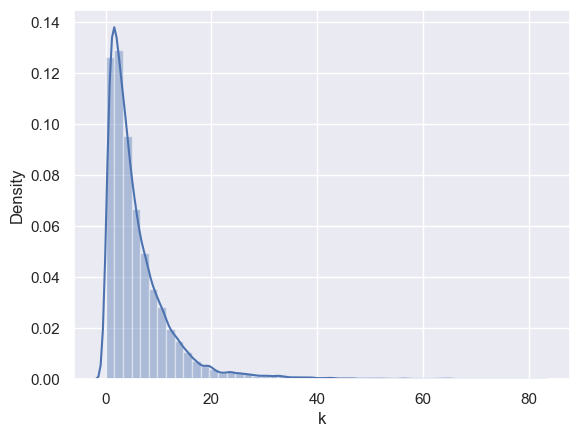

In [52]:
sns.distplot(d["k"], kde=True)

C:\Users\IdeaPad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed_kph_mean', ylabel='Density'>

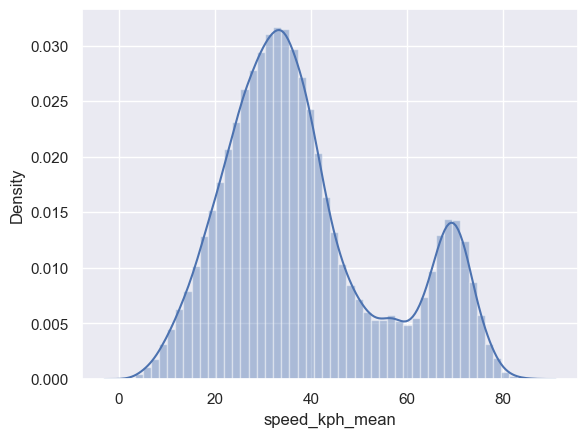

In [53]:
sns.distplot(d["speed_kph_mean"], kde=True)

C:\Users\IdeaPad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed_kph_stddev', ylabel='Density'>

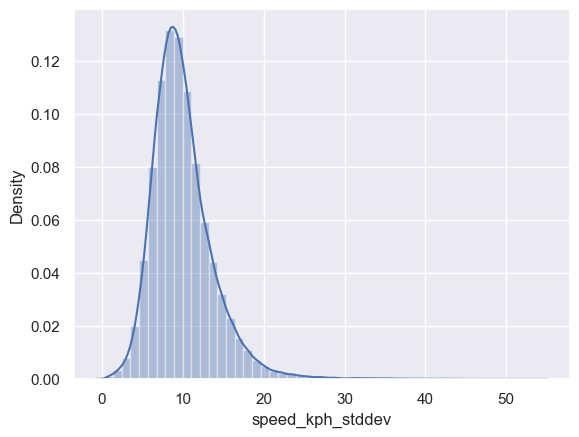

In [54]:
sns.distplot(d["speed_kph_stddev"], kde=True)

1. Between q (vehicles flow per hour) and k (occupancy)

In [25]:
x = d.iloc[:, 3:4].values
#x_matrix = x.values.reshape(-1,1) # to make matrix representation
y = d.iloc[:, 2].values

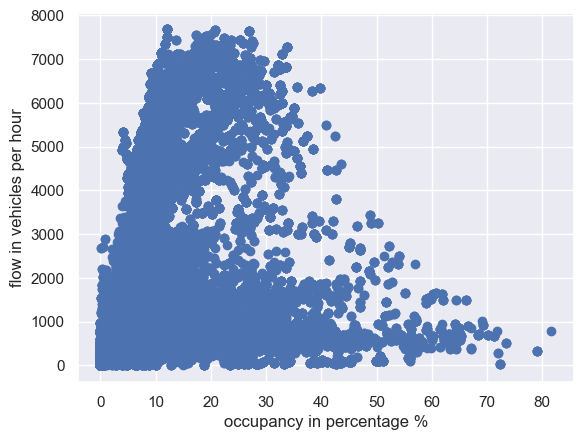

In [55]:
def viz_polymonial():
    plt.scatter(x, y)
    plt.xlabel('occupancy in percentage %')
    plt.ylabel('flow in vehicles per hour')
    plt.show()
    return
viz_polymonial()

2. between speed_kph_mean and k

In [56]:
x_k= d.iloc[:, 3:4].values
y_speed = d.iloc[:, 4].values

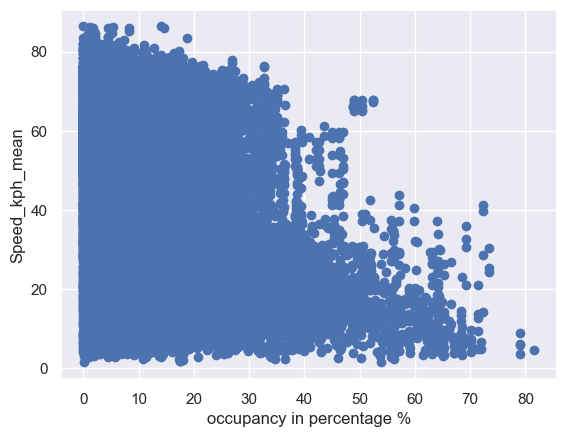

In [57]:
plt.scatter(x_k,y_speed)
plt.xlabel('occupancy in percentage %')
plt.ylabel('Speed_kph_mean')
plt.show()  

3. Between speed_kph_mean and q

In [58]:
x_q= d.iloc[:, 2:3].values
y_speed = d.iloc[:, 4].values

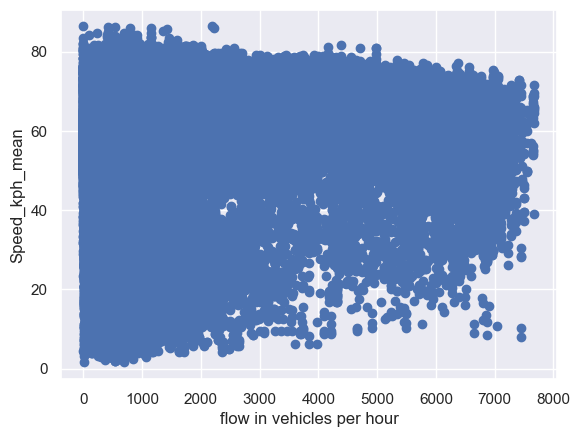

In [59]:
plt.scatter(x_q,y_speed)
plt.xlabel('flow in vehicles per hour')
plt.ylabel('Speed_kph_mean')
plt.show() 

4. Between q and hour

In [60]:
#x_hour= d.iloc[:, 0:1].values
#y_q = d.iloc[:, 2].values

In [70]:
#plt.scatter(x_hour,y_q)
#plt.xlabel('hour')
#plt.ylabel('q')
#plt.show() 

5. Between q and day

In [62]:
x_day= d.iloc[:, 1:2].values
y_q = d.iloc[:, 2].values

In [69]:
#plt.scatter(x_day,y_q)
#plt.xlabel('day')
#plt.ylabel('flow in vehicles per hour')
#plt.show() 

The highest flow in vehicles per hour is in day 2

6. hour vs day

In [64]:
#x_hour= d.iloc[:, 0:1].values
#y_day = d.iloc[:, 1].values

In [68]:
#plt.scatter(x_hour,y_day)
#plt.xlabel('hour')
#plt.ylabel('day')
#plt.show() 

7. speed mean vs speed std deviation

In [66]:
X = d[['speed_kph_mean', 'speed_kph_stddev']]

Text(0, 0.5, 'speed_kph_stddev')

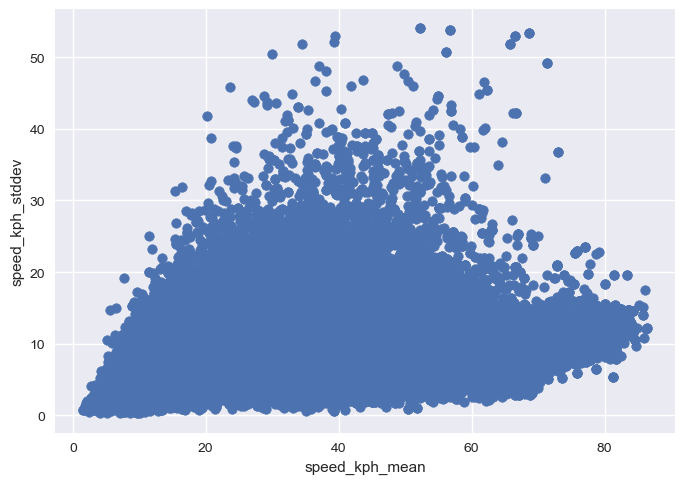

In [67]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['speed_kph_mean'], X['speed_kph_stddev'])
plt.xlabel('speed_kph_mean')
plt.ylabel('speed_kph_stddev')

# Clustering by K mean 

1. Reduce the dimensions using Principal Component Analysis (PCA)

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

We are reducing the number of dimensions from 5 to 2, also because it will be easier to visualize. 
Reducing dimensions means that there will be some loss of information. To be sure that we were not losing a lot of information, we checked the combined “explained variance ratio” of each component in your PCA result. 

In [90]:
def pca_embeddings(d):
    
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(d)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=d.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)
    
    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2

4. Hyperparameter tuning using the silhouette score method

In [94]:
def kmean_hyper_param_tuning(d):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.
    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
    parameters = [2, 3, 4, 5]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(d)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(d, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

In [92]:
def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('Traffic flow Paris')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()




2. Reducing via PCA

Explained variation per principal component: [9.99890747e-01 7.47667189e-05]
Cumulative variance explained by 2 principal components: 100.00%


           hour       day         q         k  speed_kph_mean  speed_kph_stddev
PC_1  0.000472  0.000022  0.999977  0.002082        0.006409          0.000093
PC_2  0.124195  0.002679  0.005814  0.181943        0.975061          0.026224

*************** Most important features *************************
As per PC 1:
 q    0.999977
Name: PC_1, dtype: float64


As per PC 2:
 speed_kph_mean    0.975061
Name: PC_2, dtype: float64

******************************************************************


3. HyperTuning the Parameter for KMeans

Parameter: {'n_clusters': 2} Score 0.8287003046704559
Parameter: {'n_clusters': 3} Score 0.7614488881808049
Parameter: {'n_clusters': 4} Score 0.6539683569969875
Parameter: {'n_clusters': 5} Score 0.6211424116321808


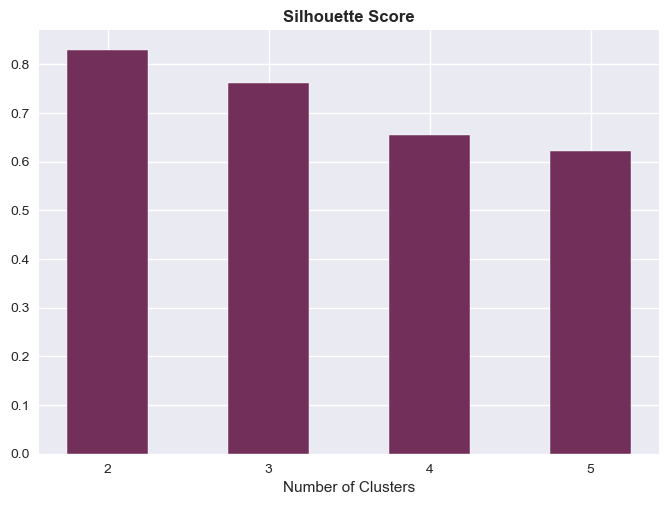

optimum num of clusters = 2


C:\Users\IdeaPad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(




4. Visualizing the data


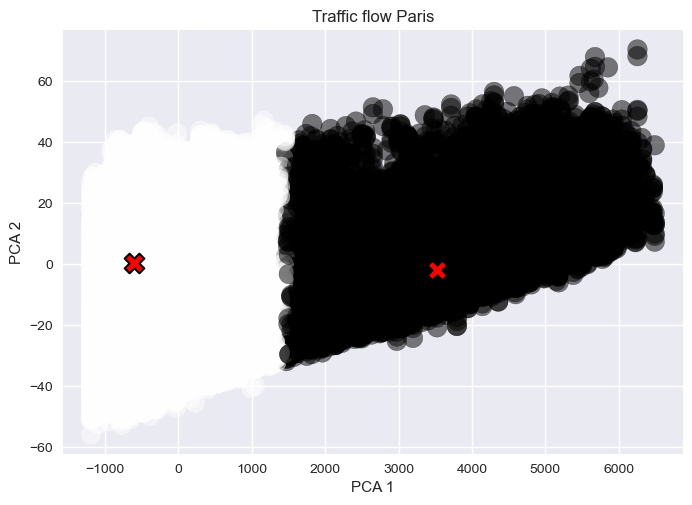

In [95]:
print("\n\n2. Reducing via PCA\n")
pca_result, pca_2 = pca_embeddings(d)

print("\n\n3. HyperTuning the Parameter for KMeans\n")
optimum_num_clusters = kmean_hyper_param_tuning(d)
print("optimum num of clusters =", optimum_num_clusters)
kmeans = KMeans(n_clusters=2)
kmeans.fit(d)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

print("\n\n4. Visualizing the data")
visualizing_results(pca_result, kmeans.labels_, centroids_pca)